In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import datetime

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/beverage_dispenser.json"

# This function gets the file content from the URL
r = requests.get(link)

# You can access to the text content with this function
r.text

data = json.loads( r.text)

'{"content":[{"date":"2019-11-14T11:53:35.000Z","product":"refill","machine":"A"},{"date":"2019-11-14T12:06:35.000Z","product":"coffee","machine":"A"},{"date":"2019-11-14T12:07:59.000Z","product":"soda","machine":"A"},{"date":"2019-11-14T12:13:45.000Z","product":"soda","machine":"A"},{"date":"2019-11-14T12:22:35.000Z","product":"coffee","machine":"A"},{"date":"2019-11-14T12:37:44.000Z","product":"soda","machine":"A"},{"date":"2019-11-14T12:47:09.000Z","product":"refill","machine":"B"},{"date":"2019-11-14T12:47:52.000Z","product":"coffee","machine":"A"},{"date":"2019-11-14T12:51:00.000Z","product":"coffee","machine":"A"},{"date":"2019-11-14T12:52:49.000Z","product":"coffee","machine":"A"},{"date":"2019-11-14T12:55:16.000Z","product":"coffee","machine":"A"},{"date":"2019-11-14T12:55:53.000Z","product":"soda","machine":"A"},{"date":"2019-11-14T12:56:49.000Z","product":"coffee","machine":"A"},{"date":"2019-11-14T13:01:09.000Z","product":"coffee","machine":"B"},{"date":"2019-11-14T13:03:46.

In [ ]:
r.json()['content']

In [ ]:
df = pd.json_normalize(r.json()['content'])
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["hour"] = df["date"].dt.hour
df["dayname"] = df["date"].dt.day_name()
df["dayname2"] = df["date"].apply(lambda x: datetime.datetime.strftime(x, "%w - %A") )
df

,date,product,machine,month,hour,dayname,dayname2
0,2019-11-14 11:53:35+00:00,refill,A,11,11,Thursday,4 - Thursday
1,2019-11-14 12:06:35+00:00,coffee,A,11,12,Thursday,4 - Thursday
2,2019-11-14 12:07:59+00:00,soda,A,11,12,Thursday,4 - Thursday
3,2019-11-14 12:13:45+00:00,soda,A,11,12,Thursday,4 - Thursday
4,2019-11-14 12:22:35+00:00,coffee,A,11,12,Thursday,4 - Thursday
...,...,...,...,...,...,...,...
11037,2019-12-25 20:10:53+00:00,nrj,A,12,20,Wednesday,3 - Wednesday
11038,2019-12-25 20:16:30+00:00,nrj,B,12,20,Wednesday,3 - Wednesday
11039,2019-12-25 20:26:35+00:00,nrj,B,12,20,Wednesday,3 - Wednesday
11040,2019-12-25 21:11:55+00:00,nrj,B,12,21,Wednesday,3 - Wednesday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11042 entries, 0 to 11041
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   date     11042 non-null  datetime64[ns, UTC]
 1   product  11042 non-null  object             
 2   machine  11042 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 258.9+ KB


In [ ]:
df["product"].unique()

array(['refill', 'coffee', 'soda', 'nrj'], dtype=object)

In [ ]:
df["product"].value_counts()

coffee    6720
soda      2880
nrj       1418
refill      24
Name: product, dtype: int64

In [ ]:
df["machine"].value_counts()

C    2766
D    2765
B    2759
A    2752
Name: machine, dtype: int64

In [ ]:
"2019-11-14 12:06:35+00:00"[8:10]

'14'

In [ ]:
df["date"].dt.month

0        11
1        11
2        11
3        11
4        11
         ..
11037    12
11038    12
11039    12
11040    12
11041    12
Name: date, Length: 11042, dtype: int64

In [ ]:
df["date"].apply(lambda x: datetime.datetime.strftime(x, "%w - %A") )

0         4 - Thursday
1         4 - Thursday
2         4 - Thursday
3         4 - Thursday
4         4 - Thursday
             ...      
11037    3 - Wednesday
11038    3 - Wednesday
11039    3 - Wednesday
11040    3 - Wednesday
11041    3 - Wednesday
Name: date, Length: 11042, dtype: object

In [ ]:
df.pivot_table(index = "dayname2", columns = "product", values = "date", aggfunc = "count")

product,coffee,nrj,refill,soda
dayname2,,,,
0 - Sunday,698.0,111.0,NaN,465.0
1 - Monday,1967.0,93.0,NaN,539.0
2 - Tuesday,932.0,88.0,NaN,22.0
3 - Wednesday,3.0,78.0,NaN,NaN
4 - Thursday,411.0,149.0,24.0,452.0
5 - Friday,2004.0,448.0,NaN,958.0
6 - Saturday,705.0,451.0,NaN,444.0


In [ ]:
df.loc[df["product"] == "coffee"]

,date,product,machine,month,hour,dayname,dayname2
1,2019-11-14 12:06:35+00:00,coffee,A,11,12,Thursday,4 - Thursday
4,2019-11-14 12:22:35+00:00,coffee,A,11,12,Thursday,4 - Thursday
7,2019-11-14 12:47:52+00:00,coffee,A,11,12,Thursday,4 - Thursday
8,2019-11-14 12:51:00+00:00,coffee,A,11,12,Thursday,4 - Thursday
9,2019-11-14 12:52:49+00:00,coffee,A,11,12,Thursday,4 - Thursday
...,...,...,...,...,...,...,...
11015,2019-12-24 16:14:16+00:00,coffee,D,12,16,Tuesday,2 - Tuesday
11019,2019-12-24 17:01:20+00:00,coffee,D,12,17,Tuesday,2 - Tuesday
11022,2019-12-24 18:33:55+00:00,coffee,B,12,18,Tuesday,2 - Tuesday
11023,2019-12-24 18:38:24+00:00,coffee,A,12,18,Tuesday,2 - Tuesday


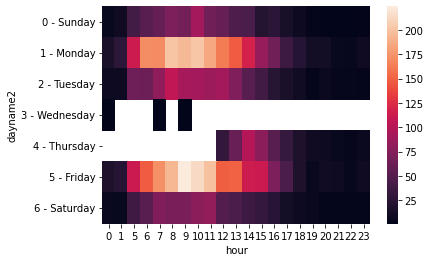

In [ ]:
sns.heatmap(df.loc[df["product"] == "coffee"].pivot_table(index = "dayname2", columns = "hour", 
               values = "date", aggfunc = "count"))

refill


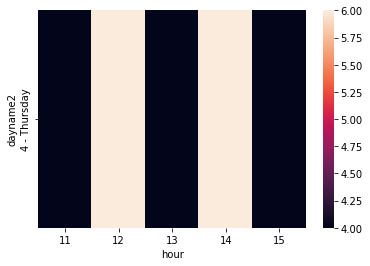

coffee


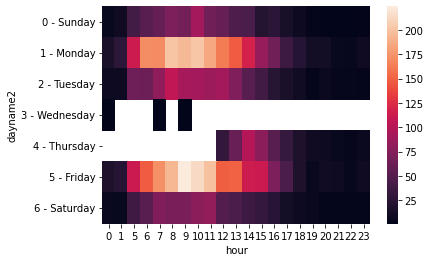

soda


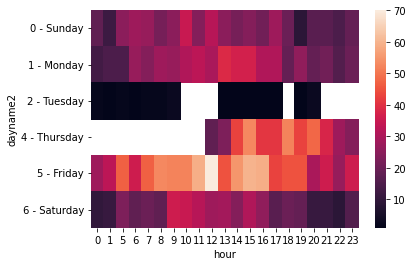

nrj


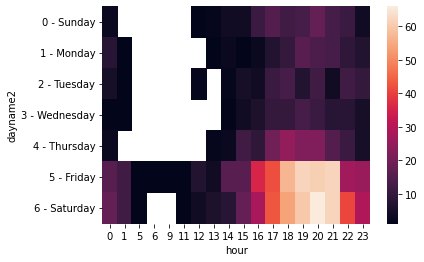

In [ ]:
for pr in df["product"].unique():
    print(pr)
    sns.heatmap(df.loc[df["product"] == pr].pivot_table(index = "dayname2", columns = "hour", 
               values = "date", aggfunc = "count"))
    plt.show()

In [ ]:
dico_ca = {"coffee" : 1,
           "soda" : 1.60,
           "nrj" : 1.80,
           "refill" : 0}

dico_cost = {"coffee" : 0.3,
           "soda" : 0.60,
           "nrj" : 0.80,
           "refill" : 0}

In [ ]:
df["ca"] = df["product"].apply(lambda x: dico_ca[x])
df["cost"] = df["product"].apply(lambda x: dico_cost[x])

In [ ]:
df["marge"] = df["ca"] - df["cost"]

In [ ]:
df.groupby(['product', 'machine']).cumcount()

0          0
1          0
2          0
3          1
4          1
        ... 
11037    344
11038    350
11039    351
11040    352
11041    345
Length: 11042, dtype: int64

In [ ]:
df

,date,product,machine,month,hour,dayname,dayname2,ca,cost,marge
0,2019-11-14 11:53:35+00:00,refill,A,11,11,Thursday,4 - Thursday,0.0,0.0,0.0
1,2019-11-14 12:06:35+00:00,coffee,A,11,12,Thursday,4 - Thursday,1.0,0.3,0.7
2,2019-11-14 12:07:59+00:00,soda,A,11,12,Thursday,4 - Thursday,1.6,0.6,1.0
3,2019-11-14 12:13:45+00:00,soda,A,11,12,Thursday,4 - Thursday,1.6,0.6,1.0
4,2019-11-14 12:22:35+00:00,coffee,A,11,12,Thursday,4 - Thursday,1.0,0.3,0.7
...,...,...,...,...,...,...,...,...,...,...
11037,2019-12-25 20:10:53+00:00,nrj,A,12,20,Wednesday,3 - Wednesday,1.8,0.8,1.0
11038,2019-12-25 20:16:30+00:00,nrj,B,12,20,Wednesday,3 - Wednesday,1.8,0.8,1.0
11039,2019-12-25 20:26:35+00:00,nrj,B,12,20,Wednesday,3 - Wednesday,1.8,0.8,1.0
11040,2019-12-25 21:11:55+00:00,nrj,B,12,21,Wednesday,3 - Wednesday,1.8,0.8,1.0


In [ ]:
df.loc[df["product"] == "refill", "refill_number"] = df.loc[df["product"] == "refill"].groupby( 'machine').cumcount()

In [ ]:
df["refill_number"].value_counts()

0.0    4
1.0    4
2.0    4
3.0    4
4.0    4
5.0    4
Name: refill_number, dtype: int64

In [ ]:
df = df.sort_values(["machine", "date"])

In [ ]:
df = df.fillna(method = "ffill")
df

,date,product,machine,month,hour,dayname,dayname2,ca,cost,marge,refill_number
0,2019-11-14 11:53:35+00:00,refill,A,11,11,Thursday,4 - Thursday,0.0,0.0,0.0,0.0
1,2019-11-14 12:06:35+00:00,coffee,A,11,12,Thursday,4 - Thursday,1.0,0.3,0.7,0.0
2,2019-11-14 12:07:59+00:00,soda,A,11,12,Thursday,4 - Thursday,1.6,0.6,1.0,0.0
3,2019-11-14 12:13:45+00:00,soda,A,11,12,Thursday,4 - Thursday,1.6,0.6,1.0,0.0
4,2019-11-14 12:22:35+00:00,coffee,A,11,12,Thursday,4 - Thursday,1.0,0.3,0.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11015,2019-12-24 16:14:16+00:00,coffee,D,12,16,Tuesday,2 - Tuesday,1.0,0.3,0.7,5.0
11019,2019-12-24 17:01:20+00:00,coffee,D,12,17,Tuesday,2 - Tuesday,1.0,0.3,0.7,5.0
11020,2019-12-24 17:37:57+00:00,nrj,D,12,17,Tuesday,2 - Tuesday,1.8,0.8,1.0,5.0
11024,2019-12-24 20:34:39+00:00,nrj,D,12,20,Tuesday,2 - Tuesday,1.8,0.8,1.0,5.0


In [ ]:
df.groupby(['product', 'machine', 'refill_number']).cumcount() +1

0          1
1          1
2          1
3          2
4          2
        ... 
11015    278
11019    279
11020     59
11024     60
11031    280
Length: 11042, dtype: int64

In [ ]:
df["sales_by_refill"] =  df.groupby(['product', 'machine', 'refill_number']).cumcount() +1
df

,date,product,machine,month,hour,dayname,dayname2,ca,cost,marge,refill_number,sales_by_refill
0,2019-11-14 11:53:35+00:00,refill,A,11,11,Thursday,4 - Thursday,0.0,0.0,0.0,0.0,1
1,2019-11-14 12:06:35+00:00,coffee,A,11,12,Thursday,4 - Thursday,1.0,0.3,0.7,0.0,1
2,2019-11-14 12:07:59+00:00,soda,A,11,12,Thursday,4 - Thursday,1.6,0.6,1.0,0.0,1
3,2019-11-14 12:13:45+00:00,soda,A,11,12,Thursday,4 - Thursday,1.6,0.6,1.0,0.0,2
4,2019-11-14 12:22:35+00:00,coffee,A,11,12,Thursday,4 - Thursday,1.0,0.3,0.7,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11015,2019-12-24 16:14:16+00:00,coffee,D,12,16,Tuesday,2 - Tuesday,1.0,0.3,0.7,5.0,278
11019,2019-12-24 17:01:20+00:00,coffee,D,12,17,Tuesday,2 - Tuesday,1.0,0.3,0.7,5.0,279
11020,2019-12-24 17:37:57+00:00,nrj,D,12,17,Tuesday,2 - Tuesday,1.8,0.8,1.0,5.0,59
11024,2019-12-24 20:34:39+00:00,nrj,D,12,20,Tuesday,2 - Tuesday,1.8,0.8,1.0,5.0,60
